In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False


# 信息熵、信息增益
### 信息熵计算：
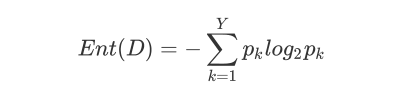
### 信息增益：
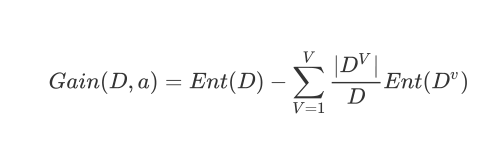

In [2]:
df = pd.read_excel('决策树-西瓜.xlsx')
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,g,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,否


In [3]:
is_good = df.好瓜.unique()
col_1 = df.色泽.unique()
col_2 = df.根蒂.unique()
col_3 = df.敲声.unique()
col_4 = df.纹理.unique()
col_5 = df.脐部.unique()
col_6 = df.触感.unique()

In [4]:
# 计算信息熵、信息增益。自定义函数
def ent(col_name, cate):
    entropys = {}  # 信息熵
    entropy_gain = {}   # 信息增益
    ent_gain = 0
    total_num = df.shape[0]   # 总行数
    p_name = 0
    yes_1 = df[df['好瓜']=='是'].shape[0] / total_num  # 是的个数占比
    no_1 = df[df['好瓜']=='否'].shape[0] / total_num   # 否的个数占比
    ENT = -((yes_1*np.log2(yes_1))+(no_1*np.log2(no_1)))  # 总信息熵
    
    for name in cate:
        total = df[df[col_name]==name].shape[0]  # 总数
        
        is_yes = df[(df[col_name]==name) & (df['好瓜']=='是')].shape[0]  # 是的个数
        is_no = df[(df[col_name]==name) & (df['好瓜']=='否')].shape[0]   # 否的个数
        col_yes = is_yes / total  # 对应是的个数
        col_no = is_no / total    # 对应否的个数
        if col_yes == 0:
            entropy = ((col_no * np.log2(col_no)))  # 对应信息熵
        elif col_no == 0:
            entropy = ((col_yes * np.log2(col_yes)))  # 对应信息熵
        else:
            entropy = -((col_yes*np.log2(col_yes)) + (col_no*np.log2(col_no)))  # 对应信息熵
        
        p_name = total / total_num
        ent_gain += p_name*entropy
        
        entropys[f'{name}信息熵'] = entropy
        
    entropy_gain[f'{col_name}信息增益'] = ENT - ent_gain
    
    return entropys, entropy_gain

In [5]:
data = []
for name in df.columns[1:-1]:
    data.append(ent(name, df[f'{name}'].unique()))
    
data

[({'青绿信息熵': 1.0, '乌黑信息熵': 0.9182958340544896, '浅白信息熵': 0.7219280948873623},
  {'色泽信息增益': 0.10812516526536531}),
 ({'蜷缩信息熵': 0.954434002924965, '稍蜷信息熵': 0.9852281360342515, '硬挺信息熵': 0.0},
  {'根蒂信息增益': 0.14267495956679288}),
 ({'浊响信息熵': 0.9709505944546686, '沉闷信息熵': 0.9709505944546686, '清脆信息熵': 0.0},
  {'敲声信息增益': 0.14078143361499584}),
 ({'清晰信息熵': 0.7642045065086203, '稍糊信息熵': 0.7219280948873623, '模糊信息熵': 0.0},
  {'纹理信息增益': 0.3805918973682686}),
 ({'凹陷信息熵': 0.863120568566631, '稍凹信息熵': 1.0, '平坦信息熵': 0.0},
  {'脐部信息增益': 0.28915878284167895}),
 ({'硬滑信息熵': 1.0, '软粘信息熵': 0.9709505944546686},
  {'触感信息增益': 0.006046489176565584})]

In [6]:
nba = pd.read_excel('NBA球员数据.xlsx')
nba = nba[['场均时间','进攻能力','球员薪金']]

In [7]:
time = nba.场均时间.unique()

In [8]:
y_1 = nba[nba['场均时间']<=5]['球员薪金'].mean()
y_2 = nba[nba['场均时间']>5]['球员薪金'].mean()
y_2

785.9443037974684

In [9]:
nba['y_hat'] = 0

In [10]:
nba['y_hat'].mask(nba['场均时间']<=5, y_1, inplace=True)
nba['y_hat'].mask(nba['场均时间']>5, y_2, inplace=True)
nba

,场均时间,进攻能力,球员薪金,y_hat
0,33.38,31.933,3468,785.944304
1,37.75,36.140,3329,785.944304
2,33.95,22.712,3127,785.944304
3,34.45,25.382,2973,785.944304
4,34.03,27.488,2951,785.944304
...,...,...,...,...
392,10.35,4.864,50,785.944304
393,16.08,6.640,40,785.944304
394,8.78,3.176,7,785.944304
395,9.77,4.106,7,785.944304


In [11]:
nba['MSE'] = (nba['球员薪金']-nba['y_hat'])**2
sum(nba['MSE']) / len(nba)

567870.7387271627

# 决策树

In [12]:

time = nba.场均时间.unique()
result = {}
for i in time:
    y_1 = nba[nba['场均时间']<=i]['球员薪金'].mean()
    y_2 = nba[nba['场均时间']>i]['球员薪金'].mean()
    y_hat = nba['场均时间'].apply(lambda x: y_1 if x<=i else y_2)
    mse = np.sum((nba['球员薪金']-y_hat)**2) / len(nba)
    result[i] = mse

# result
print(sorted(result, key=result.get)[0])
print(result[31.37])

31.37
343466.1521522634


In [13]:
# 找出分割点，逐次循环找到MSE均方误差最小时的值
kills = nba['进攻能力'].unique()
result = {}

# 循环遍历
for i in kills:
    # 计算左右两边的均值
    y_1 = nba[nba['进攻能力']<=i]['球员薪金'].mean()
    y_2 = nba[nba['进攻能力']>i]['球员薪金'].mean()
    # 通过判断条件做预测值，类似用均值填补
    y_hat = nba['进攻能力'].apply(lambda x: y_1 if x<=i else y_2)
    # 计算MSE
    mse = np.sum((nba['球员薪金']-y_hat)**2) / len(nba)
    
    result[i] = mse

# 找出最小时的元素
    
print(sorted(result, key=result.get)[0])
print(result[15.767])

15.767
348238.28012222255


# 分类  
## ID3：信息增益　　
## C4.5：信息增益率  
## CART：分类回归树 
### 分类（GINI）、回归（MSE）指数


决策树可做分类回归  
分为三种数：ID3，C4.5，CART（MSE，GINI）  
讲过程、公式  
优缺点，对应措施  